## HW 11 - Data fitting with various functions - Due Monday Nov 15, 2021


Dowload the data from the SDSS DR16:<br>
https://data.sdss.org/sas/dr16/apogee/spectro/aspcap/r12/l33/allStar-r12-l33.fits
NOTE: it is a large file and will take a while.


Using masking. Select the approprate fitting function and fit the following selections of the data:
1. Select stars only with with $-1< GLAT < 1$ <br>
   __Fit TEFF,  (TEFF\_ERR)  vs.  LogG (LOGG\_ERR)__<br>
<br>
2. Select stars only with with $GLAT < -10$ or $GLAT > 10$ <br>
   __Fit {\bf  Fe\_H,  (Fe\_H\_ERR)  vs.  O\_FE (O\_FE\_ERR)__<br>
<br>
3. Select stars only with with $-2< GLAT < 2$ <br>
   __Fit {\bf  Fe\_H,  (Fe\_H\_ERR)  vs.  O\_FE (O\_FE\_ERR)__<br>
<br>
4. Select stars only with with $GLAT < -10$ or $GLAT > 10$ <br>
   __Fit {\bf  TEFF,  (TEFF\_ERR)   vs.  (J - K) (J\_ERR, K\_ERR)__<br>
<br>
5. Select stars only with with $-10< GLAT < 10$<br>
   __Fit {\bf  GLON  vs.  VHELIO\_AVG (VERR)__<br>
<br>
6. __Fit {\bf NVISITS vs.  VSCATTER (VERR)__ For NVISITS $>= 1$<br>
<br>
7. __Fit {\bf  Fe\_H,  (Fe\_H\_ERR)  vs.  NI\_FE (NI\_FE\_ERR)__<br>
<br>

For each of the above selections:

1. What are the best-fit values of the parameters? 
2. Which fucntion fits the data best?
3. Is there a second population? (Can you fit outliers with a reasonable linear trend)

ColDefs(
    name = 'APSTAR_ID'; format = '57A'
    name = 'TARGET_ID'; format = '47A'
    name = 'ASPCAP_ID'; format = '59A'
    name = 'FILE'; format = '39A'
    name = 'APOGEE_ID'; format = '18A'
    name = 'TELESCOPE'; format = '8A'
    name = 'LOCATION_ID'; format = 'J'
    name = 'FIELD'; format = '16A'
    name = 'J'; format = 'E'
    name = 'J_ERR'; format = 'E'
    name = 'H'; format = 'E'
    name = 'H_ERR'; format = 'E'
    name = 'K'; format = 'E'
    name = 'K_ERR'; format = 'E'
    name = 'RA'; format = 'D'
    name = 'DEC'; format = 'D'
    name = 'GLON'; format = 'D'
    name = 'GLAT'; format = 'D'
    name = 'APOGEE_TARGET1'; format = 'J'
    name = 'APOGEE_TARGET2'; format = 'J'
    name = 'APOGEE_TARGET3'; format = 'J'
    name = 'APOGEE2_TARGET1'; format = 'J'
    name = 'APOGEE2_TARGET2'; format = 'J'
    name = 'APOGEE2_TARGET3'; format = 'J'
    name = 'TARGFLAGS'; format = '192A'
    name = 'SURVEY'; format = '35A'
    name = 'PROGRAMNAME'; format = '18A'
    na

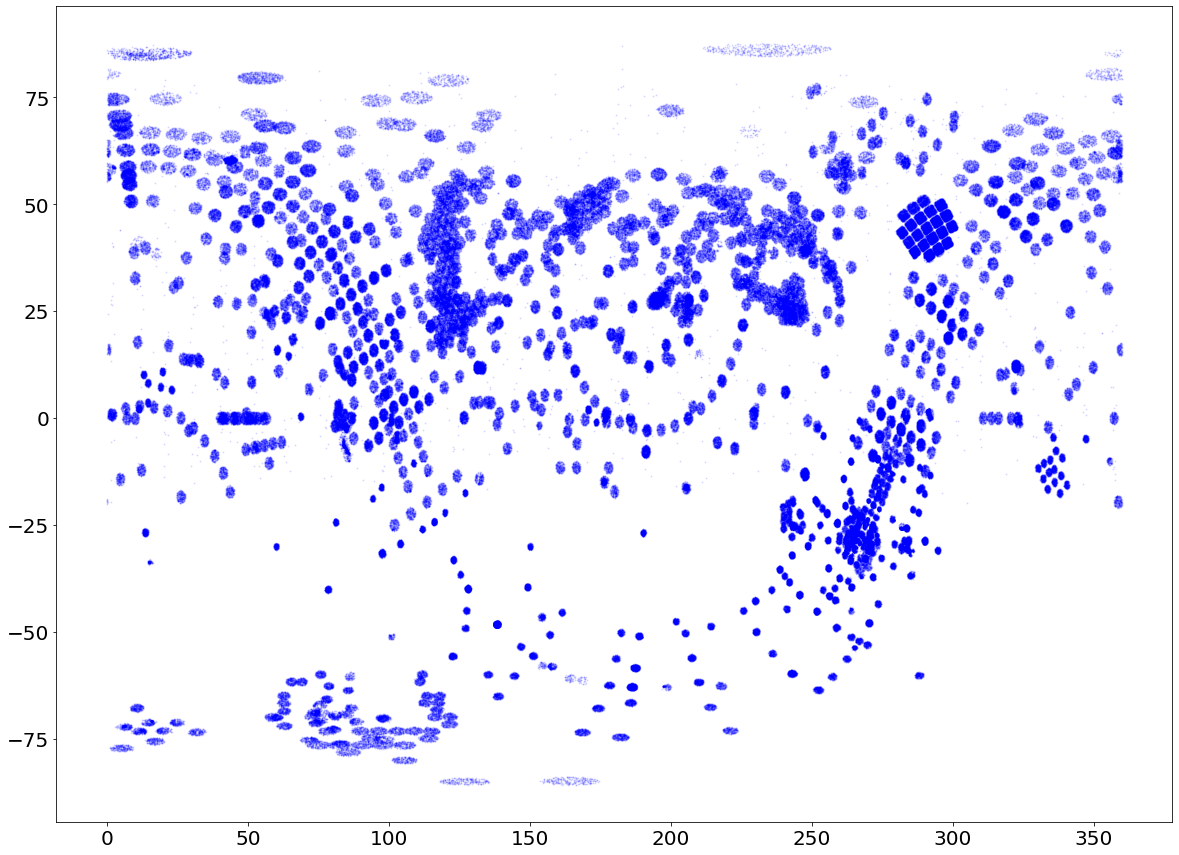

In [2]:
#possible bad values to mask; one mask to take out all of them
#for masking: & for and, | for or

from matplotlib import pyplot as plt
import numpy as np
from astropy.io import fits 
import scipy.optimize as opt



def mcFit2(func, x, y, y_err, x_err):
    slope = list()
    y_ints = list()
    iters = 500 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weightsx = np.random.randn(len(y))
        weightsy = np.random.randn(len(y))

        y_adj = y + y_err*weightsy
        x_adj = x + x_err*weightsx 

        popt, pcov = opt.curve_fit(func, x_adj, y_adj)
        slope.append(popt[0])
        y_ints.append(popt[1])

    return (np.median(slope),np.median(y_ints))


def mcFit3(func, x, y, y_err, x_err):
    paramA = list()
    paramB = list()
    paramC = list()
    iters = 500 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weightsx = np.random.randn(len(y))
        weightsy = np.random.randn(len(y))

        y_adj = y + y_err*weightsy
        x_adj = x + x_err*weightsx 

        popt, pcov = opt.curve_fit(func, x_adj, y_adj)
        paramA.append(popt[0])
        paramB.append(popt[1])
        paramC.append(popt[2])
    return (np.median(paramA),np.median(paramB),np.median(paramC))

def mcFit4(func, x, y, y_err, x_err):
    paramA = list()
    paramB = list()
    paramC = list()
    paramD = list()
    iters = 500 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weightsx = np.random.randn(len(y))
        weightsy = np.random.randn(len(y))

        y_adj = y + y_err*weightsy
        x_adj = x + x_err*weightsx 

        popt, pcov = opt.curve_fit(func, x_adj, y_adj)
        paramA.append(popt[0])
        paramB.append(popt[1])
        paramC.append(popt[2])
        paramD.append(popt[3])

    return (np.median(paramA),np.median(paramB),np.median(paramC),np.median(paramD))



# POTENTIAL FITTING FUNCTIONS
# a linspace (0, small number); don't need 500000 points for line, just 2
# number of parameters to determne whether call mcfit 2, 3, or 4
def linear(x,m,b):
    return m*x+b

def poly2(x,a,b,c):
    return a*(x**2)+(b*x)+c

def poly3(x,a,b,c,d):
    return (a*(x**3))+(b*(x**2))+(c*x)+d

def exponential(x,a,b,c,d):
    return a*np.exp(b*x + c) + d

def cosfit (x,a,b,c,d):
    return a*np.cos(b*x + c) + d

def logfit(x,a,b,c,d):
    return a*np.log(b*x + c) + d

def gaussian(x,mu,sigma):
    part1 = (1.0/np.sqrt(2*np.pi*sigma**2))
    return (part1*(np.exp((-1*x - mu)**2/(2*sigma**2))))

def lorentzian_cauchy (x,a,b,c):
    return (c)*(b**2/((x-a)**2 + b**2))

def sigmoid(x,a,b,c,d):
    return (c/(1 + np.exp(-b*(x-a))) + d)

# READ IN FITS FILES
star_hdus = fits.open('allStar-r12-l33.fits')
star = star_hdus[1].data
print(star_hdus[1].columns)
star_hdus.close()

# TWO BITWISE FLAGS FOR BAD DATA             
badbits = 2**23        # aspcapstar flag - Chemistry
suspectbits = 2**16    # star flag - Stellar parameters

# Make a Boolena Mask to remove bad data
gd = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) 
good = np.where(gd)[0]


# PLOT TO VERIFY FITS FILE READ IN & BAD MASK DATA
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
ax.scatter(star['RA'][good],star['DEC'][good],s=1,c='b',alpha=0.1)

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
plt.show()

LINEAR:  0.0011990194929178432 -3.3380423237329886


<ipython-input-3-bb9b47d6bbbd>:12: RuntimeWarning: invalid value encountered in log
  return a*np.log(b*x + c) + d


LOG:  3.133642477651744 0.9998980072125392 -2056.662911195703 -22.253591542002503
No second population


<ipython-input-3-bb9b47d6bbbd>:12: RuntimeWarning: invalid value encountered in log
  return a*np.log(b*x + c) + d
<ipython-input-3-bb9b47d6bbbd>:12: RuntimeWarning: invalid value encountered in log
  return a*np.log(b*x + c) + d


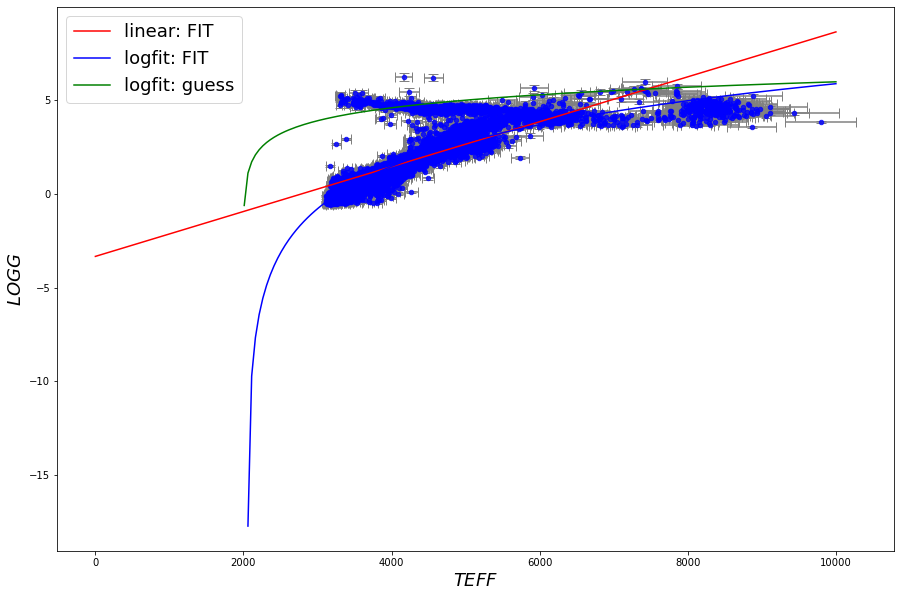

In [3]:
#Q1

from matplotlib import pyplot as plt
import numpy as np
from astropy.io import fits 
import scipy.optimize as opt

def linear(x, m, b):
    return m * x + b

def logfit(x,a,b,c,d):
    return a*np.log(b*x + c) + d

def mcFit2(func, x, y, y_err, x_err):
    slope = list()
    y_ints = list()
    iters = 500 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weightsx = np.random.randn(len(y))
        weightsy = np.random.randn(len(y))

        y_adj = y + y_err*weightsy
        x_adj = x + x_err*weightsx 

        popt, pcov = opt.curve_fit(func, x_adj, y_adj)
        slope.append(popt[0])
        y_ints.append(popt[1])

    return (np.median(slope),np.median(y_ints))

def mcFit4(func, x, y, y_err, x_err, p0=[1,1,1,1]):
    paramA = list()
    paramB = list()
    paramC = list()
    paramD = list()
    iters = 500 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weightsx = np.random.randn(len(y))
        weightsy = np.random.randn(len(y))

        y_adj = y + y_err*weightsy
        x_adj = x + x_err*weightsx 

        popt, pcov = opt.curve_fit(func, x_adj, y_adj, p0=p0)
        paramA.append(popt[0])
        paramB.append(popt[1])
        paramC.append(popt[2])
        paramD.append(popt[3])

    return (np.median(paramA),np.median(paramB),np.median(paramC),np.median(paramD))



# READ IN FITS FILES
star_hdus = fits.open('allStar-r12-l33.fits')
star = star_hdus[1].data
star_hdus.close()

# Mask bad data and -1 < GLAT < 1
badbits = 2**23
suspectbits = 2**16

mask = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) &\
    (star['GLAT'] < 1) & (star['GLAT'] > -1) & (star['TEFF'] > -9000) & (star['LOGG'] > -9000)
mask1 = np.where(mask)[0]

#linear fit
slope, intercept = mcFit2(linear, star['TEFF'][mask1], star['LOGG'][mask1], star['LOGG_ERR'][mask1], star['TEFF_ERR'][mask1])
print("LINEAR: ",slope, intercept)

#log fit
aa, bb, cc, dd = mcFit4(logfit, star['TEFF'][mask1], star['LOGG'][mask1], star['LOGG_ERR'][mask1], star['TEFF_ERR'][mask1], p0=[1,1,-2000,-3])
print("LOG: ",aa,bb,cc,dd)

print('No second population')

#PLOTS
#linear
fig1 = plt.figure(figsize=(15,10))
ax1 = fig1.add_subplot(111)
x_plot = np.linspace(1,10000,200) # X-PLOTING FOR FITS, 3rd number gives number of points
ax1.plot(x_plot,linear(x_plot, slope, intercept), c='r', label='linear: FIT')
#log
ax1.plot(x_plot,logfit(x_plot, aa, bb, cc, dd),c='b', label='logfit: FIT')
ax1.plot(x_plot,logfit(x_plot, 1,1,-2000,-3),c='g', label='logfit: guess')


ax1.scatter(star['TEFF'][mask1],star['LOGG'][mask1],s=20,c='b',alpha=0.8) #scatterplot
ax1.errorbar((star['TEFF'][mask1]),star['LOGG'][mask1], xerr=(star['TEFF_ERR'][mask1]), yerr=(star['LOGG_ERR'][mask1]), ecolor='grey',fmt='none', capsize=5, zorder=0) #error

ax1.set_xlabel('$TEFF$', fontsize=18)
ax1.set_ylabel('$LOGG$', fontsize=18)
plt.legend(loc='best', fontsize=18)
plt.show()

LINEAR:  -0.19727828084456445 0.04779780387798792


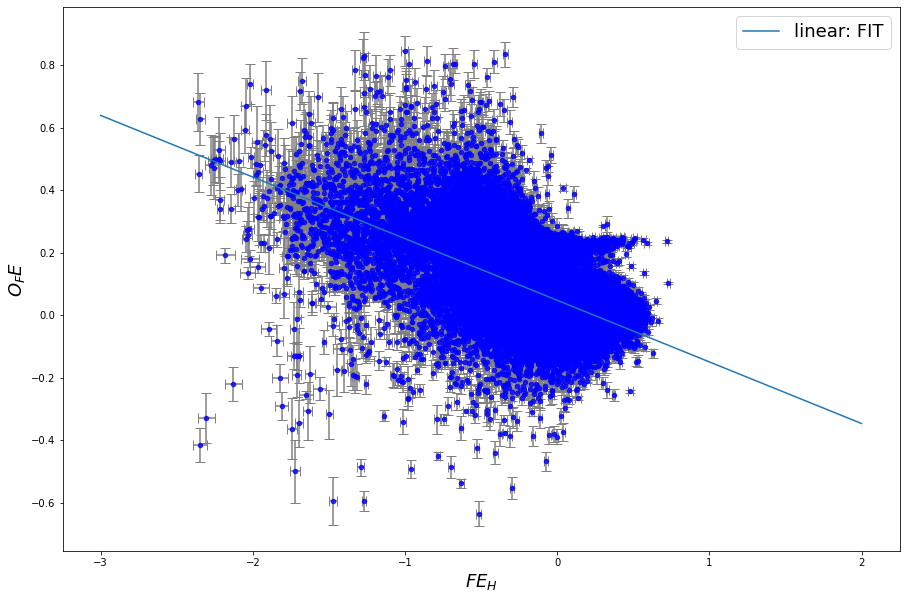

LINEAR Second Pop:  -0.0011193286221155637 -10009.510673265268


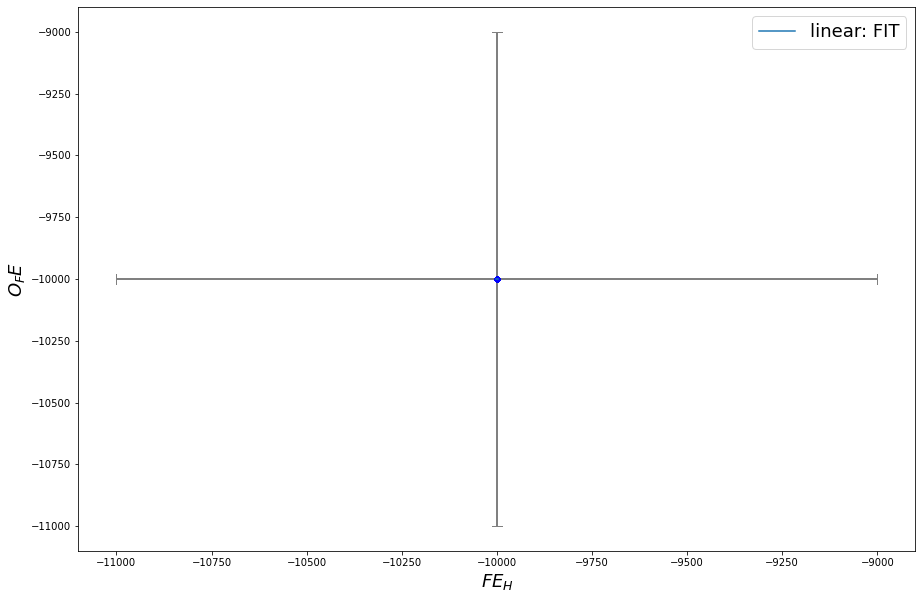

LINEAR Third Pop:  -7.239087107535624e-10 -9999.990229974019


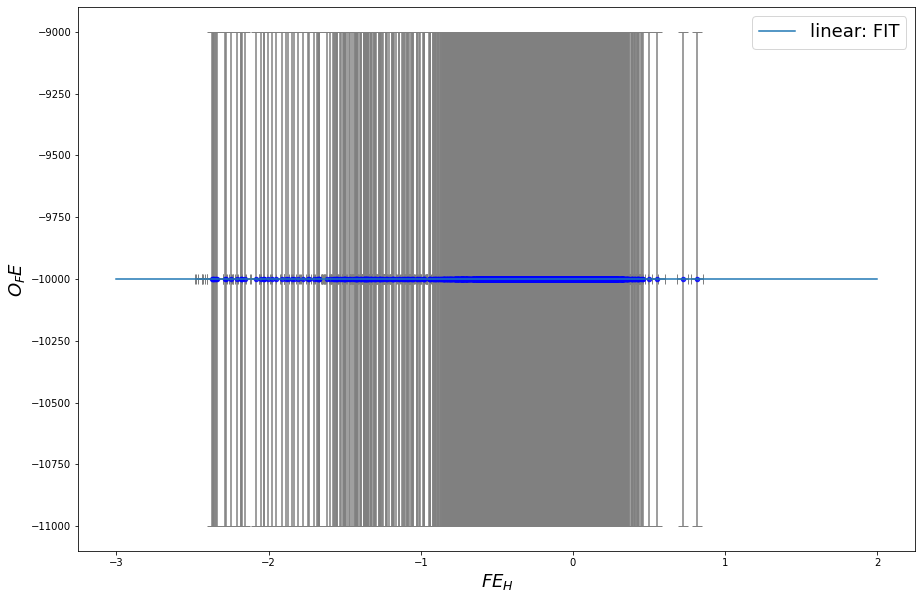

In [5]:
#𝐺𝐿𝐴𝑇 < −10 or GLAT > 10    Fit {Fe_H, (Fe_H_ERR) vs. O_FE (O_FE_ERR)

#Q2

from matplotlib import pyplot as plt
import numpy as np
from astropy.io import fits 
import scipy.optimize as opt

def linear(x, m, b):
    return m * x + b

def mcFit2(func, x, y, y_err, x_err):
    slope = list()
    y_ints = list()
    iters = 500 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weightsx = np.random.randn(len(y))
        weightsy = np.random.randn(len(y))

        y_adj = y + y_err*weightsy
        x_adj = x + x_err*weightsx 

        popt, pcov = opt.curve_fit(func, x_adj, y_adj)
        slope.append(popt[0])
        y_ints.append(popt[1])

    return (np.median(slope),np.median(y_ints))



# READ IN FITS FILES
star_hdus = fits.open('allStar-r12-l33.fits')
star = star_hdus[1].data
star_hdus.close()

# Mask bad data and -10 < GLAT < 10
badbits = 2**23
suspectbits = 2**16

mask = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) &\
    (star['GLAT'] < 10) & (star['GLAT'] > -10) & (star['Fe_H'] > -9000) & (star['O_FE'] > -9000)
masked = np.where(mask)[0]

#linear fit
slope, intercept = mcFit2(linear, star['FE_H'][masked], star['O_FE'][masked], star['FE_H_ERR'][masked], star['O_FE_ERR'][masked])
print("LINEAR: ",slope, intercept)

#PLOTS
#linear
fig1 = plt.figure(figsize=(15,10))
ax1 = fig1.add_subplot(111)
x_plot = np.linspace(-3,2,200) # X-PLOTING FOR FITS
ax1.plot(x_plot,linear(x_plot, slope, intercept), label='linear: FIT')


ax1.scatter(star['FE_H'][masked],star['O_FE'][masked],s=20,c='b',alpha=0.8) #scatterplot
ax1.errorbar((star['FE_H'][masked]),star['O_FE'][masked], xerr=(star['FE_H_ERR'][masked]), yerr=(star['O_FE_ERR'][masked]), ecolor='grey',fmt='none', capsize=5, zorder=0) #error

ax1.set_xlabel('$FE_H$', fontsize=18)
ax1.set_ylabel('$O_FE$', fontsize=18)
plt.legend(loc='best', fontsize=18)
plt.show()


#SECOND POPULATION*********************************************************************************
mask2 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) &\
    (star['GLAT'] < 10) & (star['GLAT'] > -10) & (star['FE_H'] < -5000)
masked2 = np.where(mask2)[0]

#linear fit
slope2, intercept2 = mcFit2(linear, star['FE_H'][masked2], star['O_FE'][masked2], star['FE_H_ERR'][masked2], star['O_FE_ERR'][masked2])
print("LINEAR Second Pop: ",slope2, intercept2)

#PLOTS
#linear
fig2 = plt.figure(figsize=(15,10))
ax2 = fig2.add_subplot(111)
x_plot2 = np.linspace(-10003,-9998,200) # X-PLOTING FOR FITS -3, 2
ax2.plot(x_plot2,linear(x_plot2, slope2, intercept2), label='linear: FIT')


ax2.scatter(star['FE_H'][masked2],star['O_FE'][masked2],s=20,c='b',alpha=0.8) #scatterplot
ax2.errorbar((star['FE_H'][masked2]),star['O_FE'][masked2], xerr=(star['FE_H_ERR'][masked2]), yerr=(star['O_FE_ERR'][masked2]), ecolor='grey',fmt='none', capsize=5, zorder=0) #error

ax2.set_xlabel('$FE_H$', fontsize=18)
ax2.set_ylabel('$O_FE$', fontsize=18)
plt.legend(loc='best', fontsize=18)
plt.show()


#THIRD POPULATION***************************************************************************************
mask3 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) &\
    (star['GLAT'] < 10) & (star['GLAT'] > -10) & (star['Fe_H'] > -9000) & (star['O_FE'] < -1000)
masked3 = np.where(mask3)[0]

#linear fit
slope3, intercept3 = mcFit2(linear, star['FE_H'][masked3], star['O_FE'][masked3], star['FE_H_ERR'][masked3], star['O_FE_ERR'][masked3])
print("LINEAR Third Pop: ",slope3, intercept3)

#PLOTS
#linear
fig3 = plt.figure(figsize=(15,10))
ax3 = fig3.add_subplot(111)
x_plot3 = np.linspace(-3,1,200) # X-PLOTING FOR FITS -3, 2
ax3.plot(x_plot3,linear(x_plot3, slope3, intercept3), label='linear: FIT')


ax3.scatter(star['FE_H'][masked3],star['O_FE'][masked3],s=20,c='b',alpha=0.8) #scatterplot
ax3.errorbar((star['FE_H'][masked3]),star['O_FE'][masked3], xerr=(star['FE_H_ERR'][masked3]), yerr=(star['O_FE_ERR'][masked3]), ecolor='grey',fmt='none', capsize=5, zorder=0) #error

ax3.set_xlabel('$FE_H$', fontsize=18)
ax3.set_ylabel('$O_FE$', fontsize=18)
plt.legend(loc='best', fontsize=18)
plt.show()

LINEAR:  -0.16341990181649613 0.04108702987386364


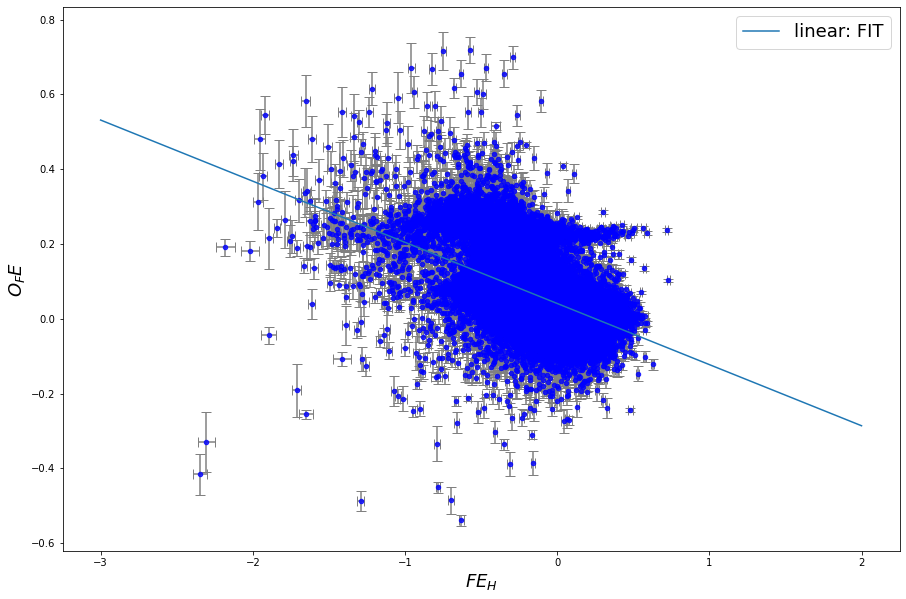

LINEAR Second Pop:  -0.001070606118337536 -10009.806236569295


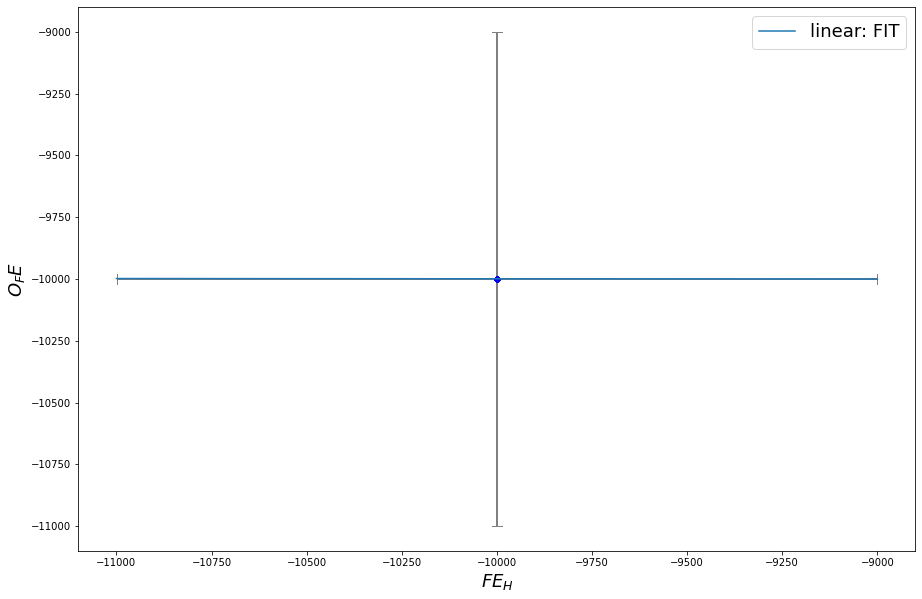

LINEAR Third Pop:  1.1923005860392522e-08 -9999.990242800195


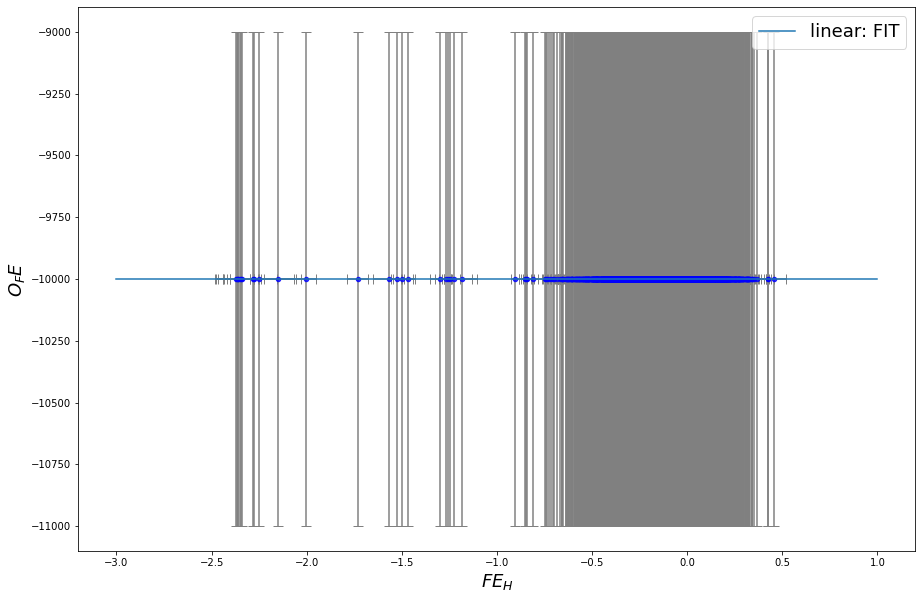

In [23]:
#𝐺𝐿𝐴𝑇 < −2 or GLAT > 2    Fit {Fe_H, (Fe_H_ERR) vs. O_FE (O_FE_ERR)

#Q3

from matplotlib import pyplot as plt
import numpy as np
from astropy.io import fits 
import scipy.optimize as opt

def linear(x, m, b):
    return m * x + b

def mcFit2(func, x, y, y_err, x_err):
    slope = list()
    y_ints = list()
    iters = 500 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weightsx = np.random.randn(len(y))
        weightsy = np.random.randn(len(y))

        y_adj = y + y_err*weightsy
        x_adj = x + x_err*weightsx 

        popt, pcov = opt.curve_fit(func, x_adj, y_adj)
        slope.append(popt[0])
        y_ints.append(popt[1])

    return (np.median(slope),np.median(y_ints))



# READ IN FITS FILES
star_hdus = fits.open('allStar-r12-l33.fits')
star = star_hdus[1].data
star_hdus.close()

# Mask bad data and -2 < GLAT < 2
badbits = 2**23
suspectbits = 2**16

mask = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) &\
    (star['GLAT'] < 2) & (star['GLAT'] > -2) & (star['Fe_H'] > -9000) & (star['O_FE'] > -9000)
masked = np.where(mask)[0]

#linear fit
slope, intercept = mcFit2(linear, star['FE_H'][masked], star['O_FE'][masked], star['FE_H_ERR'][masked], star['O_FE_ERR'][masked])
print("LINEAR: ",slope, intercept)

#PLOTS
#linear
fig1 = plt.figure(figsize=(15,10))
ax1 = fig1.add_subplot(111)
x_plot = np.linspace(-3,2,200) # X-PLOTING FOR FITS
ax1.plot(x_plot,linear(x_plot, slope, intercept), label='linear: FIT')


ax1.scatter(star['FE_H'][masked],star['O_FE'][masked],s=20,c='b',alpha=0.8) #scatterplot
ax1.errorbar((star['FE_H'][masked]),star['O_FE'][masked], xerr=(star['FE_H_ERR'][masked]), yerr=(star['O_FE_ERR'][masked]), ecolor='grey',fmt='none', capsize=5, zorder=0) #error

ax1.set_xlabel('$FE_H$', fontsize=18)
ax1.set_ylabel('$O_FE$', fontsize=18)
plt.legend(loc='best', fontsize=18)
plt.show()

#SECOND POPULATION**********************************************************
mask2 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) &\
    (star['GLAT'] < 2) & (star['GLAT'] > -2) & (star['FE_H'] < -5000)
masked2 = np.where(mask2)[0]

#linear fit
slope2, intercept2 = mcFit2(linear, star['FE_H'][masked2], star['O_FE'][masked2], star['FE_H_ERR'][masked2], star['O_FE_ERR'][masked2])
print("LINEAR Second Pop: ",slope2, intercept2)

#PLOTS
#linear
fig2 = plt.figure(figsize=(15,10))
ax2 = fig2.add_subplot(111)
x_plot2 = np.linspace(-11000,-9000,200) # X-PLOTING FOR FITS -3, 2
ax2.plot(x_plot2,linear(x_plot2, slope2, intercept2), label='linear: FIT')


ax2.scatter(star['FE_H'][masked2],star['O_FE'][masked2],s=20,c='b',alpha=0.8) #scatterplot
ax2.errorbar((star['FE_H'][masked2]),star['O_FE'][masked2], xerr=(star['FE_H_ERR'][masked2]), yerr=(star['O_FE_ERR'][masked2]), ecolor='grey',fmt='none', capsize=5, zorder=0) #error

ax2.set_xlabel('$FE_H$', fontsize=18)
ax2.set_ylabel('$O_FE$', fontsize=18)
plt.legend(loc='best', fontsize=18)
plt.show()




#THIRD POPULATION***********************************************************
mask3 = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) &\
    (star['GLAT'] < 2) & (star['GLAT'] > -2) & (star['Fe_H'] > -9000) & (star['O_FE'] < -1000)
masked3 = np.where(mask3)[0]

#linear fit
slope3, intercept3 = mcFit2(linear, star['FE_H'][masked3], star['O_FE'][masked3], star['FE_H_ERR'][masked3], star['O_FE_ERR'][masked3])
print("LINEAR Third Pop: ",slope3, intercept3)

#PLOTS
#linear
fig3 = plt.figure(figsize=(15,10))
ax3 = fig3.add_subplot(111)
x_plot3 = np.linspace(-3,1,200) # X-PLOTING FOR FITS -3, 2
ax3.plot(x_plot3,linear(x_plot3, slope3, intercept3), label='linear: FIT')


ax3.scatter(star['FE_H'][masked3],star['O_FE'][masked3],s=20,c='b',alpha=0.8) #scatterplot
ax3.errorbar((star['FE_H'][masked3]),star['O_FE'][masked3], xerr=(star['FE_H_ERR'][masked3]), yerr=(star['O_FE_ERR'][masked3]), ecolor='grey',fmt='none', capsize=5, zorder=0) #error

ax3.set_xlabel('$FE_H$', fontsize=18)
ax3.set_ylabel('$O_FE$', fontsize=18)
plt.legend(loc='best', fontsize=18)
plt.show()

LINEAR:  -0.0002154114633828863 2.5553115900376335
No second population


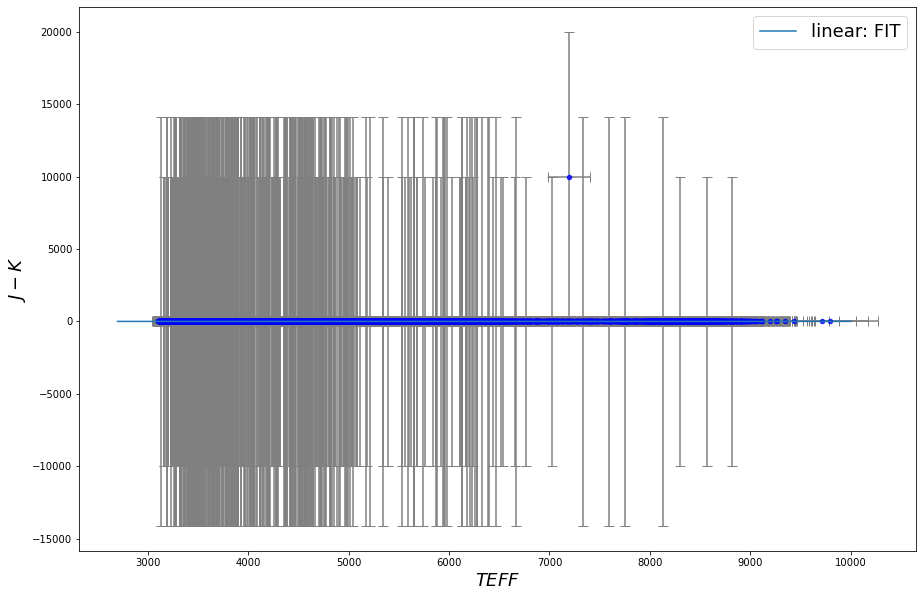

In [22]:
#𝐺𝐿𝐴𝑇 < −10 or GLAT > 10    Fit {TEFF, (TEFF_ERR) vs. J-K (J_ERR, K_ERR)

#Q4

from matplotlib import pyplot as plt
import numpy as np
from astropy.io import fits 
import scipy.optimize as opt

def linear(x, m, b):
    return m * x + b

def mcFit2(func, x, y, y_err, x_err):
    slope = list()
    y_ints = list()
    iters = 500 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weightsx = np.random.randn(len(y))
        weightsy = np.random.randn(len(y))

        y_adj = y + y_err*weightsy
        x_adj = x + x_err*weightsx 

        popt, pcov = opt.curve_fit(func, x_adj, y_adj)
        slope.append(popt[0])
        y_ints.append(popt[1])

    return (np.median(slope),np.median(y_ints))



# READ IN FITS FILES
star_hdus = fits.open('allStar-r12-l33.fits')
star = star_hdus[1].data
star_hdus.close()

# Mask bad data and -10 < GLAT < 10
badbits = 2**23
suspectbits = 2**16

JminK = star['J'] - star['K']

mask = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) &\
    (star['GLAT'] < 10) & (star['GLAT'] > -10) & (star['TEFF'] > 0) & (star['J_ERR'] < 1) & (star['K_ERR'] < 1)
masked = np.where(mask)[0]

#Mods to data
JminK = star['J'][masked] - star['K'][masked]
J_ERR1 = star['J_ERR'][masked]
J_ERR2 = star['K_ERR'][masked]
JK_ERR = np.sqrt(J_ERR1**2 + J_ERR2**2)

#linear fit
slope, intercept = mcFit2(linear, star['TEFF'][masked], JminK, JK_ERR, star['TEFF_ERR'][masked])
print("LINEAR: ", slope, intercept)
print('No second population')

#PLOTS
#linear
fig1 = plt.figure(figsize=(15,10))
ax1 = fig1.add_subplot(111)
x_plot = np.linspace(2700,10000,200) # X-PLOTING FOR FITS
ax1.plot(x_plot,linear(x_plot, slope, intercept), label='linear: FIT')


ax1.scatter(star['TEFF'][masked],JminK,s=20,c='b',alpha=0.8) #scatterplot
ax1.errorbar((star['TEFF'][masked]), JminK, xerr=(star['TEFF_ERR'][masked]), yerr=(JK_ERR), ecolor='grey',fmt='none', capsize=5, zorder=0) #error

ax1.set_xlabel('$TEFF$', fontsize=18)
ax1.set_ylabel('$J-K$', fontsize=18)
plt.legend(loc='best', fontsize=18)
plt.show()

LINEAR:  0.999994786207266 0.0008766126362027005
POLY:  -3.2755583592194705e-05 0.017118756064803217 -2.196990131744365 40.34994791759303
No second population


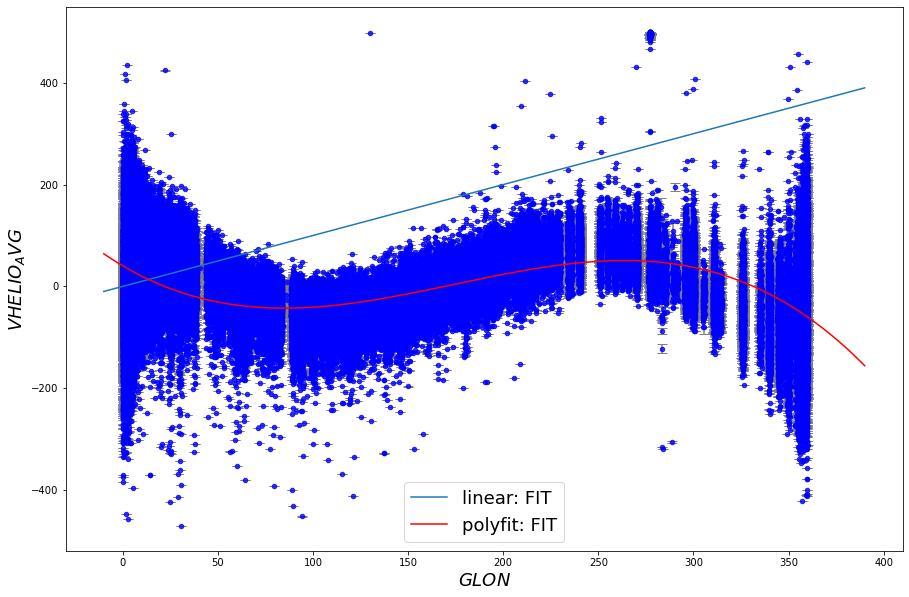

In [11]:
#𝐺𝐿𝐴𝑇 < −10 or GLAT > 10    Fit GLON vs. VHELIO_AVG (VERR)

#Q5

from matplotlib import pyplot as plt
import numpy as np
from astropy.io import fits 
import scipy.optimize as opt

def linear(x, m, b):
    return m * x + b

def mcFit2(func, x, y, y_err, x_err):
    slope = list()
    y_ints = list()
    iters = 500 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weightsx = np.random.randn(len(y))
        weightsy = np.random.randn(len(y))

        y_adj = y + y_err*weightsy
        x_adj = x + x_err*weightsx 

        popt, pcov = opt.curve_fit(func, x_adj, y_adj)
        slope.append(popt[0])
        y_ints.append(popt[1])

    return (np.median(slope),np.median(y_ints))

def poly3(x,a,b,c,d):
    return (a*(x**3))+(b*(x**2))+(c*x)+d

def mcFit4(func, x, y, y_err, x_err):
    paramA = list()
    paramB = list()
    paramC = list()
    paramD = list()
    iters = 500 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weightsx = np.random.randn(len(y))
        weightsy = np.random.randn(len(y))

        y_adj = y + y_err*weightsy
        x_adj = x + x_err*weightsx 

        popt, pcov = opt.curve_fit(func, x_adj, y_adj)
        paramA.append(popt[0])
        paramB.append(popt[1])
        paramC.append(popt[2])
        paramD.append(popt[3])

    return (np.median(paramA),np.median(paramB),np.median(paramC),np.median(paramD))


# READ IN FITS FILES
star_hdus = fits.open('allStar-r12-l33.fits')
star = star_hdus[1].data
star_hdus.close()

# Mask bad data and -10 < GLAT < 10
badbits = 2**23
suspectbits = 2**16

mask = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) &\
    (star['GLAT'] < 10) & (star['GLAT'] > -10) & (star['VHELIO_AVG'] > -500) & (star['VHELIO_AVG'] < 500)
masked = np.where(mask)[0]

#linear fit
slope, intercept = mcFit2(linear, star['GLON'][masked], star['GLON'][masked], star['VERR'][masked], star['VERR'][masked])
print("LINEAR: ",slope, intercept)

#PLOTS
#linear
fig1 = plt.figure(figsize=(15,10))
ax1 = fig1.add_subplot(111)
x_plot = np.linspace(-10,390,200)
ax1.plot(x_plot,linear(x_plot, slope, intercept), label='linear: FIT')
#poly3
aa, bb, cc, dd = mcFit4(poly3, star['GLON'][masked], star['VHELIO_AVG'][masked], star['VERR'][masked], star['VERR'][masked])
ax1.plot(x_plot,poly3(x_plot, aa, bb, cc, dd),c='r', label='polyfit: FIT')
print("POLY: ",aa, bb, cc, dd)
print("No second population")


ax1.scatter(star['GLON'][masked],star['VHELIO_AVG'][masked],s=20,c='b',alpha=0.8) #scatterplot
ax1.errorbar((star['GLON'][masked]),star['VHELIO_AVG'][masked], yerr=(star['VERR'][masked]), ecolor='grey',fmt='none', capsize=5, zorder=0) #error

ax1.set_xlabel('$GLON$', fontsize=18)
ax1.set_ylabel('$VHELIO_AVG$', fontsize=18)
plt.legend(loc='best', fontsize=18)
plt.show()



LINEAR:  0.06580672163392222 0.1621808942396456


<ipython-input-10-f3f16bd041d0>:32: RuntimeWarning: invalid value encountered in log
  return a*np.log(b*x + c) + d
/Users/bkeo/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


LOG:  1.0 1.0 1.0 1.0
No second population


<ipython-input-10-f3f16bd041d0>:32: RuntimeWarning: divide by zero encountered in log
  return a*np.log(b*x + c) + d
<ipython-input-10-f3f16bd041d0>:32: RuntimeWarning: invalid value encountered in log
  return a*np.log(b*x + c) + d


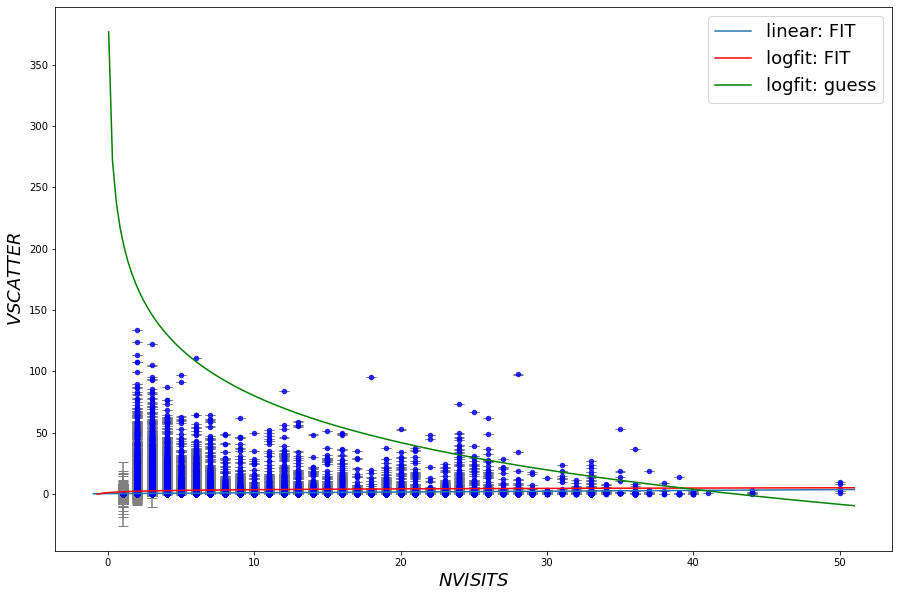

In [10]:
#NVISITS vs. VSCATTER (VERR) for NVISITS >= 1

#Q6

from matplotlib import pyplot as plt
import numpy as np
from astropy.io import fits 
import scipy.optimize as opt

def linear(x, m, b):
    return m * x + b

def mcFit2(func, x, y, y_err, x_err):
    slope = list()
    y_ints = list()
    iters = 500 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weightsx = np.random.randn(len(y))
        weightsy = np.random.randn(len(y))

        y_adj = y + y_err*weightsy
        x_adj = x + x_err*weightsx 

        popt, pcov = opt.curve_fit(func, x_adj, y_adj)
        slope.append(popt[0])
        y_ints.append(popt[1])

    return (np.median(slope),np.median(y_ints))

def logfit(x,a,b,c,d):
    return a*np.log(b*x + c) + d

def mcFit4(func, x, y, y_err, x_err):
    paramA = list()
    paramB = list()
    paramC = list()
    paramD = list()
    iters = 500 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weightsx = np.random.randn(len(y))
        weightsy = np.random.randn(len(y))

        y_adj = y + y_err*weightsy
        x_adj = x + x_err*weightsx 

        popt, pcov = opt.curve_fit(func, x_adj, y_adj)
        paramA.append(popt[0])
        paramB.append(popt[1])
        paramC.append(popt[2])
        paramD.append(popt[3])

    return (np.median(paramA),np.median(paramB),np.median(paramC),np.median(paramD))


# READ IN FITS FILES
star_hdus = fits.open('allStar-r12-l33.fits')
star = star_hdus[1].data
star_hdus.close()

# Mask bad data and -10 < GLAT < 10
badbits = 2**23
suspectbits = 2**16

mask = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) &\
    (star['NVISITS'] >= 1)
masked = np.where(mask)[0]

#linear fit
slope, intercept = mcFit2(linear, star['NVISITS'][masked], star['VSCATTER'][masked], star['VERR'][masked], star['VERR'][masked])
print("LINEAR: ",slope, intercept)

#log fit
aa, bb, cc, dd = mcFit4(logfit, star['NVISITS'][masked], star['VSCATTER'][masked], star['VERR'][masked], star['VERR'][masked])
print("LOG: ",aa,bb,cc,dd)
print("No second population")

#PLOTS
#linear
fig1 = plt.figure(figsize=(15,10))
ax1 = fig1.add_subplot(111)
x_plot = np.linspace(-1,51,200) # X-PLOTING FOR FITS
ax1.plot(x_plot,linear(x_plot, slope, intercept), label='linear: FIT')
#log
ax1.plot(x_plot,logfit(x_plot, aa, bb, cc, dd),c='r', label='logfit: FIT') 
ax1.plot(x_plot,logfit(x_plot, -55,.0001,0,-300),c='g', label='logfit: guess')


ax1.scatter(star['NVISITS'][masked],star['VSCATTER'][masked],s=20,c='b',alpha=0.8) #scatterplot
ax1.errorbar((star['NVISITS'][masked]),star['VSCATTER'][masked], yerr=(star['VERR'][masked]), ecolor='grey',fmt='none', capsize=5, zorder=0) #error

ax1.set_xlabel('$NVISITS$', fontsize=18)
ax1.set_ylabel('$VSCATTER$', fontsize=18)
plt.legend(loc='best', fontsize=18)
plt.show()
